# **Building Linear Regression Machine Learning Model for House Price Prediction based on availble features**

### Submitted by: **Taqi Haider**                           


 Due Date: 25-11-2024

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#### Loading the Dataset

In [3]:
#df = pd.read_csv("/content/drive/MyDrive/NSU-ML-Data/house_price_regression_dataset.csv")
df = pd.read_csv("house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [10]:
# checking the shape of dataset
df.shape

(1000, 8)

In [ ]:
# checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [12]:
# checking the descriptive statisctics of dataset
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [13]:
# Checking null values in the dataset
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [14]:
# checking the dataset if it has duplicate values
df.duplicated().sum()

0

<Axes: >

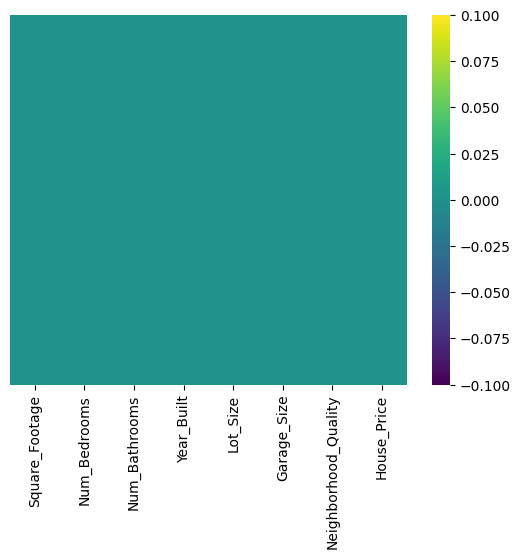

In [ ]:
# heatmap of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [31]:
import altair as alt

# Create the line chart
chart = alt.Chart(df).mark_line().encode(
    x='Square_Footage',
    y='House_Price').properties(width=1000, height=400,
    title='House Price vs. Square Footage')

# Display the chart
chart


alt.Chart(...)

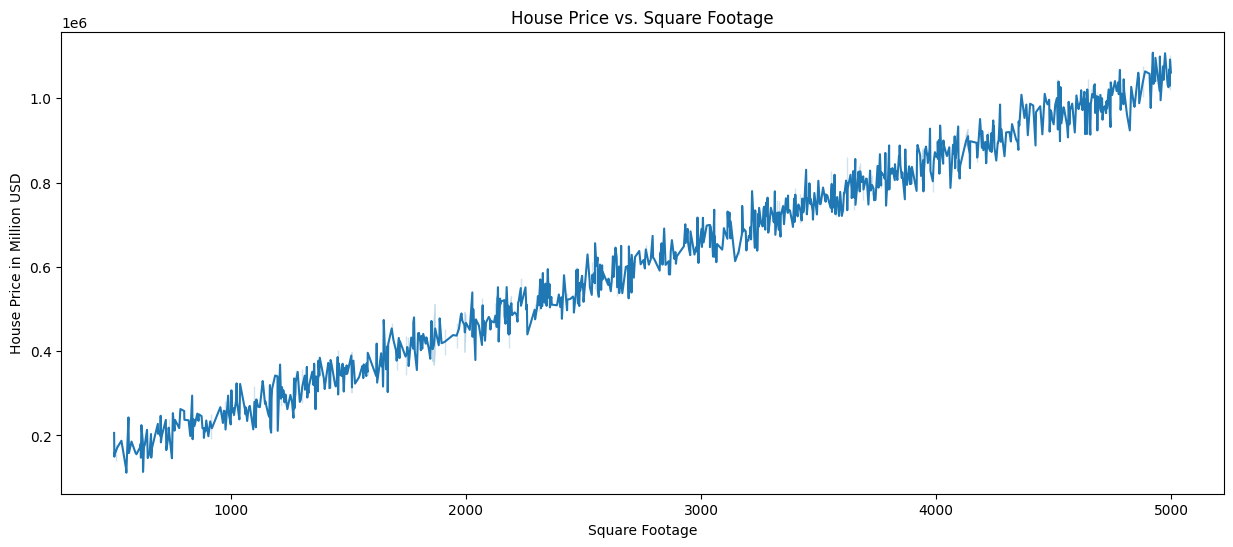

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create the line plot
sns.lineplot(x='Square_Footage', y='House_Price', data=df, ax=ax)

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('House Price in Million USD')
plt.title('House Price vs. Square Footage')
plt.show()


In [19]:
# correlation of features with each other
df.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


<Axes: >

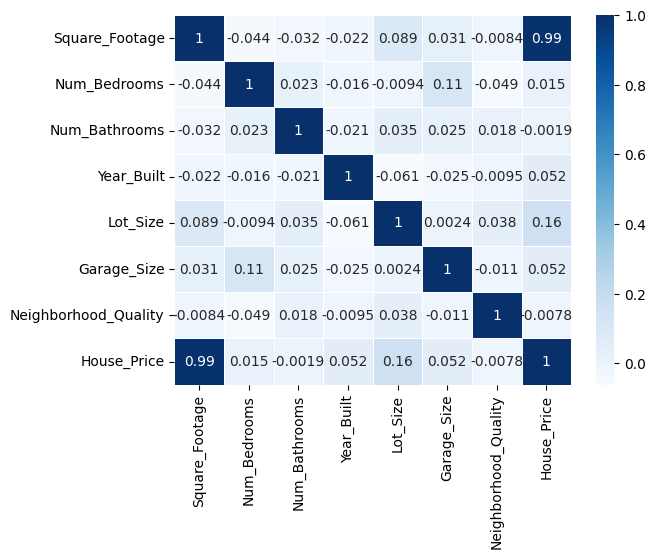

In [38]:
# heatmap plot of correlation of dataset.
sns.heatmap(df.corr("pearson"), annot= True,linewidths=0.5, linecolor='white', cmap= "Blues")

#### Data Preprocessing 

In [65]:
# splitting the dataset into features and target variable.
X = df.drop([ "House_Price","Num_Bedrooms", "Num_Bathrooms", "Year_Built", "Lot_Size", "Garage_Size", "Neighborhood_Quality"], axis=1)
y = df["House_Price"]

In [66]:
X.head()

,Square_Footage
0,1360
1,4272
2,3592
3,966
4,4926


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 20, random_state=42)


#### Model Training

In [68]:
# fitting the linear Regression model on dataset
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation

In [ ]:
# Checking the MAE, MSE and R square metrics on test data
y_pred  = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)
print(f"Mean Squared Error {mse:.2f}")
print(f"Mean Absolute Error {mae:.2f}")
print(f"R square Error {r_square*100:.2f}")

Mean Squared Error 977521377.0586132
Mean Absolute Error 26632.267594669236
R square Error 98.62424919890162
